# librerías

In [2]:
import requests
from bs4 import BeautifulSoup as bs
import random
import time
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import undetected_chromedriver as uc   # Sirve para que las paginas web no se den cuenta que entramos desde un PC
from colorama import Fore

# Exploración para un solo piso

In [3]:
''' Abrir chrome desde un código '''
browser = uc.Chrome()

''' Poner la URL que queremos explorar '''
url = "https://www.idealista.com/inmueble/102923049/"

''' Decirle al browser que me abre esta pagina '''
browser.get(url)

''' Aceptar o declinar las cookies '''    # si le doy clic derecho y Copy Xpath me sale --> //*[@id="didomi-notice-agree-button"]
browser.find_element("xpath", '//*[@id="didomi-notice-agree-button"]').click()

''' Sacar el HTML de la pagina ''' 
html = browser.page_source

''' Para organizar el html que me sale ''' 
soup = bs(html, 'lxml')

''' Al terminar el proceso cierro la pestaña '''
browser.close()

''' Cierro el navegador '''
browser.quit()

In [5]:
'''Para encontrar el titulo de los pisos en venta inspeccionamos en la pagina web que nombre recibe este atributo y lo buscamos en el soup'''

'''En la pagina de idealista al inspeccionar el titulo nos aparece:
<span class="main-info__title-main"> Casa o chalet independiente en venta en Sant Llorenç Savall</span>'''

'''Podemos ver que el SPAN es de tipo CLASS y esa clase se llama de la manera main-info_tittle__main'''

titulo = soup.find("span", {"class":"main-info__title-main"}).text
titulo

' Casa o chalet independiente en venta en Sant Llorenç Savall'

In [6]:
'''Ahora vamos a buscar la localización'''
localización = soup.find("span", {"class":"main-info__title-minor"}).text
#localización

# El resultado para este caso será y no está en una lista, solo es un texto --> localización = 'Vallès Occidental, Barcelona'

'''Pero supongamos que queremos separar el barrio y la ciudad con una coma y meterlo en una lista'''
localización = soup.find("span", {"class":"main-info__title-minor"}).text.split(",")
#localización

# El resultado para este caso será una lista --> localización = ['Vallès Occidental', ' Barcelona']

'''Supongamos que solo quiero extraer el barrio y que la ciudad no me intereza, entonces cogemos la primera columna de la lista'''
localización = soup.find("span", {"class":"main-info__title-minor"}).text.split(",")[0]
localización

'Vallès Occidental'

In [7]:
'''Ahora vamos a buscar el precio'''
precio = soup.find("span",{"class":"txt-bold"}).text
#precio

# El resultado será --> '245.000' y nos interesa tenerlo sin punto para que no se interprete como decimal entonces aplicamos un replace

'''Aplicamos el replace y lo volvemos int'''
precio = int(soup.find("span",{"class":"txt-bold"}).text.replace(".",""))
precio

245000

# Extraer información de las cajas de la pagina idealista

In [8]:
'''Ahora deseo extraer las características básicas de la casa, esta información se encuentra en una caja que al inspeccionarla es más compleja
que los ficheros que acabamos de manipular'''

'''Caja de las Características Básicas, Equipamento y Certificado energético'''

caja_completa = soup.find("div",{"class":"details-property"})


'''Ahora vamos a extraer solo la información de las Características Básicas
Volvemos a aplicar un .find y ponemos las caracteristicas del código de esta caja --> <div class="details-property-feature-one">'''

caja_info_básica = soup.find("div",{"class":"details-property"}).find("div", {"class":"details-property-feature-one"})
caja_info_básica


<div class="details-property-feature-one">
<h2 class="details-property-h2">Características básicas</h2>
<div class="details-property_features">
<ul>
<li> Casa o chalet independiente</li>
<li>1 planta</li>
<li>182 m² construidos, 180 m² útiles</li>
<li>3 habitaciones</li>
<li>3 baños</li>
<li>Parcela de 952 m²</li>
<li>Terraza y balcón</li>
<li>Segunda mano/buen estado</li>
<li>Calefacción central: Gasoil</li>
</ul>
</div>
</div>

# La celda de código a continuación es a modo de ejemplo

In [9]:
'''IMPORTANTE = LAS VARIABLES caja_info_básica_1 y caja_info_básica_2 FUERON CREADAS PARA VER LOS RESULTADOS PERO NO SE ESTÁN USANDO'''

'''Ahora necesitamos quitarle el ruido a la información, podemos observar que las que tienen <li> son las que nos interesan'''
caja_info_básica_1 = caja_info_básica.find_all("li")

# El resultado es una lista que solo tiene columnas
'''[<li> Casa o chalet independiente</li>,
 <li>1 planta</li>,
 <li>182 m² construidos, 180 m² útiles</li>,
 <li>3 habitaciones</li>,
 <li>3 baños</li>,
 <li>Parcela de 952 m²</li>,
 <li>Terraza y balcón</li>,
 <li>Segunda mano/buen estado</li>,
 <li>Calefacción central: Gasoil</li>]'''

'''Extraemos la primera columna'''
caja_info_básica_2 = caja_info_básica.find_all("li")[0]

# El resultado será
'''<li> Casa o chalet independiente</li>'''

'''Para quitar el <li> le ponemos el .text y el .strip me quita algunos espacios extraños en el texto'''
caja_info_básica.find_all("li")[0].text.strip()

'Casa o chalet independiente'

# Continuación de la extracción de información de las cajas

In [10]:
'''Ahora necesitamos automatizar esto para cada una de las columnas de la lista de caja_info_básica'''

'''Aplicar .text.strip() para cada elemento (i) en caja_info_básica.find_all("li")'''
caja_caracteristicas_básicas = [i.text.strip() for i in caja_info_básica.find_all("li")]
caja_caracteristicas_básicas

['Casa o chalet independiente',
 '1 planta',
 '182 m² construidos, 180 m² útiles',
 '3 habitaciones',
 '3 baños',
 'Parcela de 952 m²',
 'Terraza y balcón',
 'Segunda mano/buen estado',
 'Calefacción central: Gasoil']

In [11]:
'''Extraer información de la caja de equipamento'''

caja_equipamento_1 = soup.find("div",{"class":"details-property-feature-two"})
caja_equipamento = [i.text.strip() for i in caja_equipamento_1.find_all("li")]
caja_equipamento


['Piscina', 'Jardín', 'No indicado']

In [12]:
Ubicación_1 = soup.find("div", {"id":"headerMap"})
Ubicación = [i.text.strip() for i in Ubicación_1.find_all("li")]
Ubicación

['', 'Sant Llorenç Savall', 'Vallès Occidental, Barcelona']

In [13]:
Ubicación_1

<div class="clearfix" id="headerMap">
<h2 class="ide-box-detail-h2">Ubicación</h2>
<ul>
<li class="header-map-list">
</li>
<li class="header-map-list">
Sant Llorenç Savall
</li>
<li class="header-map-list">
Vallès Occidental, Barcelona
</li>
</ul>
</div>

# Exploración para todos los pisos

In [14]:
''' Abrir chrome desde un código '''
browser = uc.Chrome()

''' Poner la URL que queremos explorar '''
url = "https://www.idealista.com/venta-viviendas/sant-llorenc-savall-barcelona/"

''' Decirle al browser que me abre esta pagina '''
browser.get(url)

''' Aceptar o declinar las cookies '''    # si le doy clic derecho y Copy Xpath me sale --> //*[@id="didomi-notice-agree-button"]
browser.find_element("xpath", '//*[@id="didomi-notice-agree-button"]').click()

''' Sacar el HTML de la pagina ''' 
html = browser.page_source

''' Para organizar el html que me sale ''' 
soup = bs(html, 'lxml')

''' Al terminar el proceso cierro la pestaña '''
browser.close()

''' Cierro el navegador '''
browser.quit()

# Tener en cuenta para extraer la información de todos los pisos
Notar que cuando estamos inspeccionando la pagina cada uno de los elementos tiene una flechita que me permite desplegar una serie de sub-elementos dentro del elemento principal, en la siguiente imagen podemos ver que < main class=listing-items > contiene unos sub elementos llamados < article > que corresponde a cada uno de los pisos

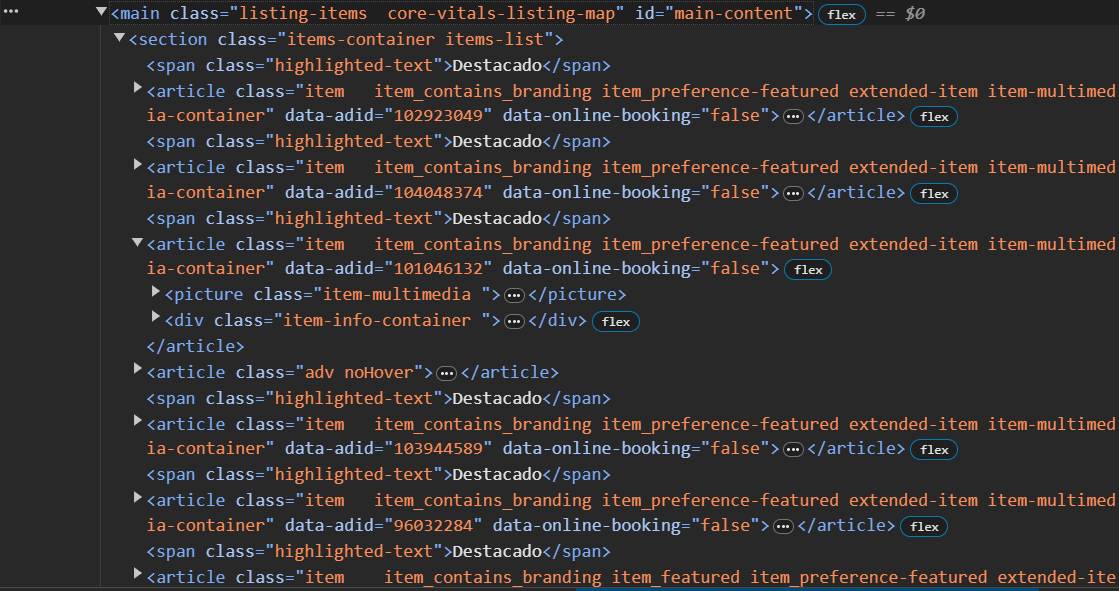

In [15]:
'''Vamos a extraer estos articulos correspondientes a los pisos del elemento principal main'''
articulos = soup.find("main",{"class":"listing-items"}).find_all("article")

'''Cada uno de los articulos contiene un ID que es la identificación de cada uno de los pisos, vamos a extraer ese ID'''
ids = [articulo.get("data-adid") for articulo in articulos]
ids

['102923049',
 '104048374',
 '103043902',
 None,
 '101046132',
 '103944589',
 '96032284',
 '101686228',
 '102922283',
 '101017912',
 '97352685',
 '100155683',
 '103499733',
 '98053836',
 '85300997',
 '86748588',
 '104125874',
 '101047125',
 '103281342',
 None,
 '104008993',
 '103018994',
 '87916798',
 '100096301',
 '96566107',
 '102206100',
 '101736790',
 '103278836',
 '104014384',
 '102339128',
 '100157298',
 '103938573']

In [16]:
'''Ahora vamos a quitar los None ya que no nos da información relevante'''
ids_muebles = [muebles for muebles in ids if muebles is not None]
ids_muebles

['102923049',
 '104048374',
 '103043902',
 '101046132',
 '103944589',
 '96032284',
 '101686228',
 '102922283',
 '101017912',
 '97352685',
 '100155683',
 '103499733',
 '98053836',
 '85300997',
 '86748588',
 '104125874',
 '101047125',
 '103281342',
 '104008993',
 '103018994',
 '87916798',
 '100096301',
 '96566107',
 '102206100',
 '101736790',
 '103278836',
 '104014384',
 '102339128',
 '100157298',
 '103938573']

# Automatización para extraer los id de los inmuebles
Esta caja de código nos va a permitir sacar todos los Id's de cada una de las paginas en el municipio de sant llorenc savall barcelona en www.
idealista.com

In [34]:
busqueda = "sant-llorenc-savall-barcelona"

x = 1

idd = [] 

'''Iniciamos un bucle while True, el bucle se ejecutará indefinidamente a menos que se rompa con una declaración break'''
while True:
    
    ''' Abrir chrome desde un código '''
    browser = uc.Chrome()
    
    url = f"https://www.idealista.com/venta-viviendas/{busqueda}/pagina-{x}.htm"

    browser.get(url)

    '''Se espera un tiempo aleatorio entre 10 y 12 segundos para simular el comportamiento humano en la navegación web'''
    time.sleep(random.randint(10,12))

    '''Se intenta hacer clic en un botón de aceptar cookies. Si no se encuentra el botón, se pasa al bloque except'''
    try:
        browser.find_element("xpath", '//*[@id="didomi-notice-agree-button"]').click()
    
    except:
        pass

    html = browser.page_source

    soup = bs(html, 'lxml')

    '''Ahora necesitamos saber en que pagina nos encontramos y volver este numero un entero'''
    pagina_actual = int(soup.find("div", {"class":"pagination"}).find("li",{"class":"selected"}).text)

    ''' Al terminar el proceso cierro la pestaña '''
    browser.close()
    
    ''' Cierro el navegador '''
    browser.quit()

    '''Si x es igual a la pagina actual entonces extraemos los articulos correspondientes, además, si x no es igual a la página actual, 
    se rompe el bucle while con la declaración break.'''
    if x == pagina_actual:
        articulos = soup.find("main",{"class":"listing-items"}).find_all("article")
    
    else:
        break
    
    x = x+1

    for articulo in articulos: 
        
        id_muebles = articulo.get("data-adid")
        
        idd.append(id_muebles)

        time.sleep(random.randint(1,3))
        print(id_muebles)



102923049
104048374
101046132
None
103043902
103944589
96032284
97352685
101017912
102922283
101686228
100155683
103499733
85300997
98053836
86748588
101047125
104125874
103281342
None
104008993
103018994
87916798
100096301
96566107
101736790
102206100
104014384
103278836
102339128
100157298
104004550
104004550
104037721
96560404
None
102317980
102920005
96720999
103260044
103471454
89972906
98284097
98179204
104014682
104009838
95623729
103642235
103945486
102539591
102406138
None
99766229
101794087
103670796
97155978
103721643
98887473
102878824
98512984
100144101
95179850
95179886
96562903
97299003
103954292
103066688
None
101385767
85237669
87488194
101385793
103102002
103893599


In [ ]:
idd_limpia = [item for item in idd if item is not None]
idd_limpia

In [44]:
'''Almacenamos los Id en un DataFrame'''
ids_casas = pd.DataFrame(idd)
ids_casas.columns = ["id"]

'''Le quitamos los None'''
ids_casas = ids_casas.dropna()
ids_casas.reset_index(drop=True, inplace=True)
ids_casas

'''Si queremos lo almacenamos en un csv'''
ids_casas.to_csv("ids_casas.csv", index = False)

In [45]:
'''Ahora vamos a sacar los datos de cada una de las casas creando una varaible en formato series'''
casas = pd.Series()

# Automatizar parsear inmuebles
Ahora con todos los Id's de cada una de las paginas vamos a extraer la información de cada uno de los pisos como lo hicimos la inicio:
- Titulo
- Precio
- Ubicación
- Caracteristicas básicas
- Equipamento

In [62]:
'''Creamos una función para extraer la información de cada uno de los Id's'''

def parsear_inmueble(id_muebles):

    print("\n Casa numero: " + id_muebles)

    browser = uc.Chrome()

    url = f"https://www.idealista.com/inmueble/{id_muebles}/"

    browser.get(url)

    html = browser.page_source

    soup = bs(html, 'lxml')

    browser.close()
    
    browser.quit()

    titulo = soup.find("span", {"class":"main-info__title-main"}).text
    print("\n Titulo:" + titulo)

    localización = soup.find("span", {"class":"main-info__title-minor"}).text.split(",")[0]
    print("\n Localización:" + localización)

    precio = int(soup.find("span",{"class":"txt-bold"}).text.replace(".",""))
    print("\n Precio:" + str(precio))

    caja_info_básica = soup.find("div",{"class":"details-property"}).find("div", {"class":"details-property-feature-one"})
    caja_caracteristicas_básicas = [i.text.strip() for i in caja_info_básica.find_all("li")]
    print("\n Características básicas:" + str(caja_caracteristicas_básicas))

    caja_equipamento_1 = soup.find("div",{"class":"details-property-feature-two"})
    caja_equipamento = [i.text.strip() for i in caja_equipamento_1.find_all("li")]
    print("\n Equipamiento:" + str(caja_equipamento))

    '''Añadimos la información al Serie que hemos creado'''
    casas["Titulo"] = titulo

    casas["Localización"] = localización

    casas["precio"] = precio

    casas["caracteristicas básicas"] = caja_caracteristicas_básicas

    casas["Equipamento"] = caja_equipamento

    '''La serie creada vamos a convertirla en un DataFrame'''
    df_casas = pd.DataFrame(casas)

    return(df_casas.T)

In [63]:
df_casas = parsear_inmueble(ids_casas.iloc[0].id)

for i in range(1,len(idd_limpia)):
    df_casas = pd.concat([df_casas, parsear_inmueble(idd_limpia[i])])

    time.sleep(random.randint(4,8))


 Casa numero: 102923049

 Titulo: Casa o chalet independiente en venta en Sant Llorenç Savall

 Localización:Vallès Occidental

 Precio:245000

 Características básicas:['Casa o chalet independiente', '1 planta', '182 m² construidos, 180 m² útiles', '3 habitaciones', '3 baños', 'Parcela de 952 m²', 'Terraza y balcón', 'Segunda mano/buen estado', 'Calefacción central: Gasoil']

 Equipamiento:['Piscina', 'Jardín', 'No indicado']

 Casa numero: 104048374

 Titulo: Chalet pareado en venta en Josep Albages

 Localización:Sant Llorenç Savall

 Precio:269000

 Características básicas:['Chalet pareado', '3 plantas', '254 m² construidos, 165 m² útiles', '5 habitaciones', '4 baños', 'Parcela de 268 m²', 'Terraza y balcón', 'Plaza de garaje incluida en el precio', 'Segunda mano/buen estado', 'Armarios empotrados', 'Trastero', 'Orientación sur, este', 'Construido en 1995', 'Calefacción individual']

 Equipamiento:['Jardín', 'Consumo: \n174 kWh/m² año', 'Emisiones: \n45 kg CO2/m² año']

 Casa nume

In [65]:
df_casas.reset_index(drop=True, inplace=True)
df_casas

,Titulo,Localización,precio,caracteristicas básicas,Equipamento
0,Chalet pareado en venta en Josep Albages,Sant Llorenç Savall,269000,"[Chalet pareado, 3 plantas, 254 m² construidos...","[Jardín, Consumo: \n174 kWh/m² año, Emisiones:..."
1,Chalet pareado en venta en Josep Albages,Sant Llorenç Savall,269000,"[Chalet pareado, 3 plantas, 254 m² construidos...","[Jardín, Consumo: \n174 kWh/m² año, Emisiones:..."
2,Casa de pueblo en venta en calle Nou,Sant Llorenç Savall,92000,"[Casa de pueblo, 4 plantas, 241 m² construidos...","[Consumo: \n208 kWh/m² año, Emisiones: \n43 kg..."
3,Casa o chalet independiente en venta en Avets,Sant Llorenç Savall,245000,"[Casa o chalet independiente, 2 plantas, 249 m...","[Piscina, Jardín, Consumo: \n174 kWh/m² año, E..."
4,Casa o chalet independiente en venta en aveni...,Sant Llorenç Savall,360000,"[Casa o chalet independiente, 1 planta, 241 m²...","[Piscina, Jardín, Consumo: \n99 kWh/m² año, Em..."
...,...,...,...,...,...
64,"Casa de pueblo en venta en calle Barcelona, 9",Sant Llorenç Savall,260000,"[Casa de pueblo, 3 plantas, 160 m² construidos...","[Consumo: \n128,9 kWh/m² año, Emisiones: \n28 ..."
65,Finca rústica en venta en carretera de sant f...,Sant Llorenç Savall,400000,"[Finca rústica, 1 planta, 400 m² construidos, ...",[En trámite]
66,Estudio en venta en Sant Llorenç Savall,Vallès Occidental,78000,"[48 m² construidos, Sin habitación, 1 baño, Se...",[No indicado]
67,Casa o chalet en venta en carretera de Monistrol,Sant Llorenç Savall,176300,"[Casa o chalet, 329 m² construidos, 229 m² úti...",[Consumo:]


In [68]:
df_casas.to_csv("01_casas_idealista.csv", index = False, sep = ";", encoding = "utf-16")